# Regression to the mean

In [1]:
import numpy as np

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

Suponha que temos vários candidatos para uma vaga na nossa empresa. Cada um vai fazer uma prova e receberá uma nota de zero a um.

O que a gente não sabe é que, na verdade, os candidatos são idênticos, e suas notas são perfeitas variáveis aleatórias entre zero e um!

Então, aplicamos nossa prova e eis o resultado:

In [2]:
candidatos = {
    'Ana': np.random.rand,
    'Beatriz': np.random.rand,
    'Carlos': np.random.rand,
    'Daniel': np.random.rand,
    'Eduardo': np.random.rand,
    'Francisco': np.random.rand,
    'Gabriel': np.random.rand,
    'Helena': np.random.rand,
    'Isabel': np.random.rand,
    'João': np.random.rand,
    'Lucas': np.random.rand,
    'Maria': np.random.rand,
    'Natália': np.random.rand,
    'Pedro': np.random.rand,
    'Ricardo': np.random.rand,
    'Sofia': np.random.rand,
    'Tomás': np.random.rand,
    'Victor': np.random.rand,
    'Xenia': np.random.rand,
    'Yasmin': np.random.rand,
    'Zara': np.random.rand,
}

In [3]:
notas = {candidato: f() for candidato, f in candidatos.items()}

In [4]:
for candidato, nota in notas.items():
    print(f'"{candidato}" obteve nota {nota:.2f}')

"Ana" obteve nota 0.37
"Beatriz" obteve nota 0.95
"Carlos" obteve nota 0.73
"Daniel" obteve nota 0.60
"Eduardo" obteve nota 0.16
"Francisco" obteve nota 0.16
"Gabriel" obteve nota 0.06
"Helena" obteve nota 0.87
"Isabel" obteve nota 0.60
"João" obteve nota 0.71
"Lucas" obteve nota 0.02
"Maria" obteve nota 0.97
"Natália" obteve nota 0.83
"Pedro" obteve nota 0.21
"Ricardo" obteve nota 0.18
"Sofia" obteve nota 0.18
"Tomás" obteve nota 0.30
"Victor" obteve nota 0.52
"Xenia" obteve nota 0.43
"Yasmin" obteve nota 0.29
"Zara" obteve nota 0.61


In [5]:
vencedor = max(notas, key=notas.get)
melhor_nota = notas[vencedor]
print(f'"{vencedor}" venceu com nota {melhor_nota:.2f}')

"Maria" venceu com nota 0.97


Agora contratamos o melhor candidato. Vamos passar uma tarefa para ele e novamente medir a qualidade do seu desempenho - uma nota entre zero e um, como na prova.

In [6]:
nota_nova = candidatos[vencedor]()
print(f'Nota nova de "{vencedor}": {nota_nova:.2f}')

Nota nova de "Maria": 0.14


Epa, como assim? Muito provavelmente o desempenho do novo funcionário não é tão estelar como foi seu desempenho na prova de seleção! Ele ficou menos competente nesse período?

Não, o que aconteceu é que o desempenho do melhor candidato na prova foi justamente isso: o melhor desempenho observado entre os candidatos! Não foi uma medida "inocente" de desempenho de alguem, mas sim um desempenho que foi escolhido justamente por ser o mais alto de uma lista de desempenhos medidos. Matematicamente:

- A nota potencial de cada candidato é obtida da sua distribuição de probabilidade de notas. Neste exemplo, todos tem a mesma distribuição:

    $$
    X_{i} \sim U(0, 1)
    $$

    (a nota de cada um é uma amostra de uma distribuição uniforme entre zero e um)

- A *maior* nota é, portanto, outra variável aleatória:

    $$
    Z = \max_{i}{X_i}
    $$

Vamos comparar as distribuições de $X_{i}$ e $Z$:

In [7]:
n_candidatos = len(candidatos)

print(f'Número de candidatos: {n_candidatos}')

Número de candidatos: 21


In [8]:
n_experimentos = 1_000_000
notas_obtidas = np.random.rand(n_experimentos, n_candidatos)

In [9]:
import matplotlib.pyplot as plt

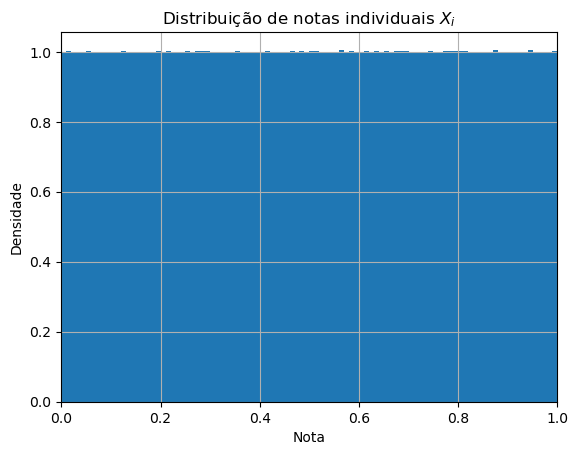

In [10]:
plt.figure()
val, bins, _ = plt.hist(notas_obtidas.flatten(), bins=100, density=True)
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.title('Distribuição de notas individuais $X_{i}$')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [11]:
max_nota = notas_obtidas.max(axis=1)

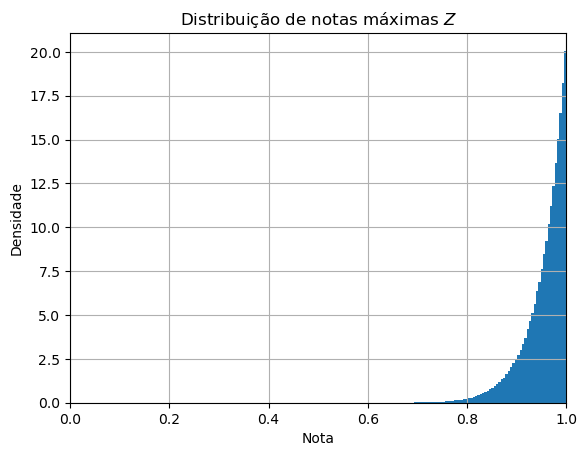

In [12]:
plt.figure()
val_max, bins_max, _ = plt.hist(max_nota, bins=100, density=True)
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.title('Distribuição de notas máximas $Z$')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

Qual a chance de que o desempenho de um candidato na prova de seleção seja maior que seu desempenho no cotidiano? Queremos saber, matematicamente, o seguinte:

$$
P(X_i < Z) = ?
$$

***

***Exercício***

Obtenha empiricamente este valor através de simulação.